In [1]:
!pip install cartopy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 10.8 MB 14.5 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 10.8 MB 34.4 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 10.8 MB 28.0 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 10.8 MB 54.7 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 12.1 MB 67.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 46 kB 4.4 MB/s 
  Created wheel for cartopy: filename=Cartopy-0.19.0.post1-cp37-cp37

In [2]:
import netCDF4
import numpy as np
from scipy.cluster.vq import *
from matplotlib import colors as c
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
%matplotlib inline

In [3]:
f = netCDF4.Dataset('/content/drive/MyDrive/Private/Image_Similarity/new_ERA5_meteo_sfc_2021_daily.nc', 'r')
lats = f.variables['latitude'][:]
lons = f.variables['longitude'][:]
pw = f.variables['sst'][0,:,:]
t2m = f.variables['sst'][0,:,:]

#f.close()

In [4]:
# Flatten image to get line of values
flatraster = pw.flatten()
flatraster.mask = False
flatraster = flatraster.data

In [5]:
# Create figure to receive results
#fig = plt.figure(figsize=[40,14])
plt.rcParams['figure.figsize'] = (12.0, 8.0)
#fig.suptitle('K-Means Clustering')

In [6]:
np.nanmin(pw), np.nanmax(pw)

(287.5809096329569, 293.98515551881616)

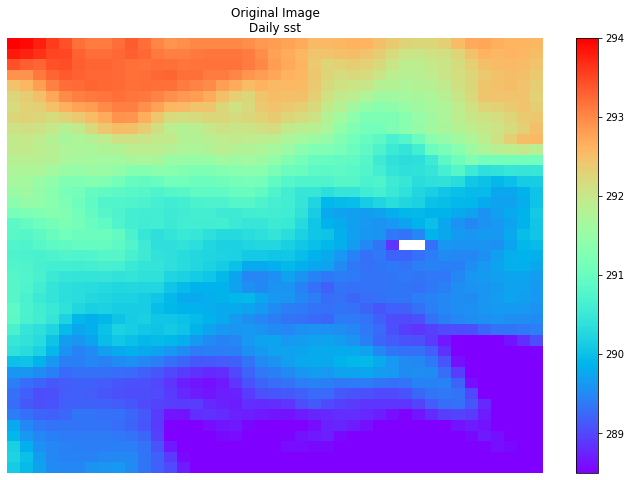

In [10]:
# In first subplot add original image
plt.rcParams['figure.figsize'] = (12.0, 8.0)

#ax = plt.subplot(241)
fig, ax = plt.subplots(1, sharex=True)
ax.axis('off')
ax.set_title('Original Image\nDaily sst')
original=plt.imshow(pw, cmap='rainbow', vmin = 288.5, vmax = 294.0, interpolation='nearest', aspect='auto',  origin='lower')
plt.colorbar(original, cmap='rainbow', ax=ax, orientation='vertical')
plt.show()
